In [3]:
import tensorflow as tf

In [4]:
var = tf.random.uniform([1])
print(var.numpy())

[0.11974049]


In [10]:
def data_creation(w = 0.1, b = 0.5, n = 100):
    X = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(n,), mean=0.0, stddev=0.01)
    Y =  X*w + b + noise
    return X.numpy(), Y.numpy()

X, Y = data_creation(n=100)

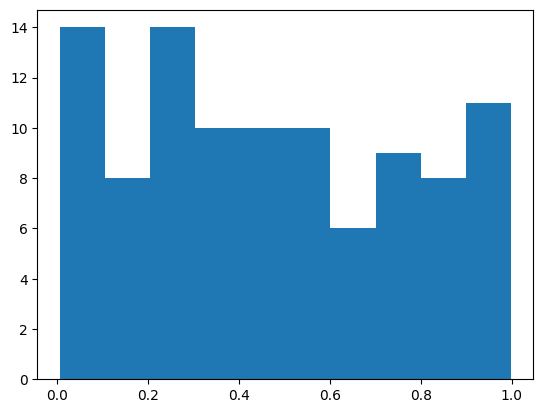

In [13]:
%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(X)
mpl.show()

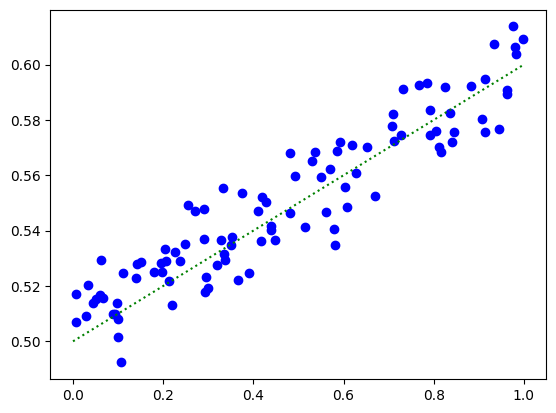

In [84]:
w = 0.1
b = 0.5
mpl.plot(X, Y, 'bo')
mpl.plot([0, 1], [0*w+b, 1*w+b], 'g:')

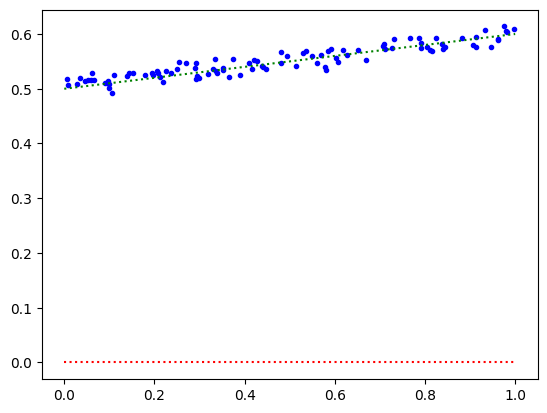

In [17]:
w_guess = 0.0
b_guess = 0.0
mpl.plot(X, Y, 'b.')
mpl.plot([0, 1], [0*w+b, 1*w+b], 'g:')
mpl.plot([0, 1], [0*w_guess+b_guess, 1*w_guess+b_guess], 'r:')

In [24]:
def predict(x, w=w, b=b):
    y = x*w+b
    return y

In [8]:
def mean_squared_error(y_pred, Y):
    return tf.reduce_mean(tf.square(y_pred-Y))

In [38]:
print(mean_squared_error(predict(X), Y))

tf.Tensor(0.3055006, shape=(), dtype=float32)


In [39]:
w_guess = 0.1
b_guess = 0.5
print(mean_squared_error(predict(X), Y))

tf.Tensor(0.000116731106, shape=(), dtype=float32)


In [40]:
w_guess = 1
b_guess = -5
print(mean_squared_error(predict(X), Y))

tf.Tensor(25.289783, shape=(), dtype=float32)


In [177]:
# w = tf.Variable(0.0)
# b = tf.Variable(0.0)

learning_rate = 0.1
steps = 200

for step in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X, w=w, b=b)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0]*learning_rate)
    b.assign_sub(gradients[1]*learning_rate)

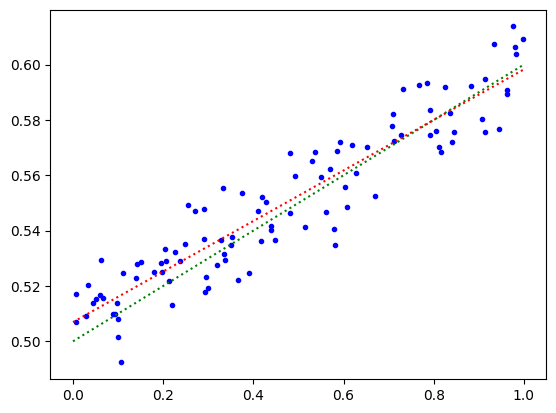

In [181]:
wt = 0.1
bt = 0.5
mpl.plot(X, Y, 'b.')
mpl.plot([0, 1], [0*wt+bt, 1*wt+bt], 'g:')
mpl.plot([0, 1], [0*w+b, 1*w+b], 'r:')